# Data Text Media Analytics **Coldplay**
Rentang waktu yang digunakan 27 Mei 2023 hingga 19 Juni 2023 dari website detik.com
1. Ferdinand Sitompul (2206051576)
2. Najwa Putri Faradila (2206051355)
3. Kayla Zahira A (2206053890)

# Menggunakan 4 Module
Modul-modul yang digunakan memiliki fungsi-fungsi berikut:
1. `requests` (diimpor sebagai `req`) digunakan untuk mengirim permintaan HTTP dalam Python.
2. `BeautifulSoup` (diimpor sebagai `bs`) digunakan untuk melakukan *web scraping*. Pada kasus ini, modul ini dapat digunakan untuk mengekstrak informasi tertentu dari konten HTML halaman web.
3. `datetime` digunakan untuk memformat tanggal dan waktu sesuai kebutuhan.
4. `csv`digunakan untuk menulis ke file CSV.

In [1]:
import requests as req
from bs4 import BeautifulSoup as bs
from datetime import datetime
import csv

# Melakukan *Web Scraping* pada situs web **detik.com**
1. `hades` digunakan saat mengirim permintaan HTTP.
2. `scrape_detik(hal)` untuk mengambil data dari halaman pencarian detik.com untuk kata kunci "coldplay". Dalam kasus ini, kami mengambil 15 halaman.
3. `url`: Variabel ini berisi URL dari halaman pencarian detik.com untuk kata kunci "coldplay" dan nomor halaman yang ditentukan.
4. `ge = req.get(url, headers=hades).text`: Permintaan GET dikirim ke URL dan asilnya akan diambil dalam bentuk teks HTML.
5. `sop = bs(ge, 'lxml')`: Objek BeautifulSoup dibuat dengan menggunakan teks HTML yang diperoleh dari permintaan sebelumnya. Ini akan membantu dalam mengambil informasi dari HTML dan menavigasi elemen-elemen di dalamnya.
6. `li = sop.find('div', class_='list media_rows list-berita')` berisi daftar berita yang akan diambil.
7. `lin = li.find_all('article')` memberikan daftar artikel berita.
8. `for x in lin:` untuk iterasi pada setiap artikel berita dalam daftar.
9. `link = x.find('a')['href']` mendapatkan URL artikel berita dari elemen "a" dalam artikel tersebut.
10. `date = x.find('a').find('span', class_='date').text.replace('WIB', '').replace('detikNews', '').split(',')[1]` mendapatkan tanggal publikasi kemudian diubah formatnya dan disimpan dalam variabel `date`.
11. `headline = x.find('a').find('h2').text` untuk mendapatkan judul artikel berita dari elemen "h2" dalam artikel tersebut.
12. `ge_ = req.get(link, headers=hades).text` untuk mendapatkan konten lengkap artikel dan hasilnya akan diambil dalam bentuk teks HTML.
13. `sop_ = bs(ge_, 'lxml')` untuk mengambil informasi dari HTML dan menavigasi elemen-elemen di dalamnya.
14. `content = sop_.find_all('div', class_='detail__body-text itp_bodycontent')` berisi konten artikel berita.
15. `for x in content:` untuk iterasi pada setiap elemen konten artikel.
16. `x = x.find_all('p')` semua elemen "p" di dalam elemen konten artikel ditemukan.
17. `y = [y.text for y in x]` untuk mengekstrak teks dari setiap elemen "p" dan menyimpannya dalam bentuk daftar.
18. `content_ = ''.join(y).replace('\n', '').replace('ADVERTISEMENT', '').replace('SCROLL TO RESUME CONTENT', '')` menyatukan teks dari daftar menjadi satu string, dan melakukan beberapa penggantian teks untuk membersihkan konten artikel dari karakter yang tidak diinginkan.
19. `print(f'done[{a}] > {headline[0:10]}')`untuk menunjukkan bahwa pengambilan data artikel selesai untuk artikel dengan judul yang diberikan.
20. `with open('coldplay.csv', 'a') as file: wr = csv.writer(file, delimiter=',') wr.writerow([headline, date, link, content_])` untuk membuka file CSV dengan mode 'a' (append) dan menulis baris baru ke dalamnya.
21. `scrape_detik(15)` untuk memanggil fungsi `scrape_detik` dengan argumen `hal` sebanyak 15.

In [2]:
hades = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'}

# Pengambilan data dari situs web detik.com
def scrape_detik(hal):
  global hades
  a = 1
  for page in range(1, hal+1):
    url = f'https://www.detik.com/search/searchall?query=coldplay&siteid=2&page={page}'
    ge = req.get(url, headers=hades).text
    sop = bs(ge, 'lxml')
    li = sop.find('div', class_='list media_rows list-berita')
    lin = li.find_all('article')
    for x in lin:
      link = x.find('a')['href']
      date = x.find('a').find('span', class_='date').text.replace('WIB', '').replace('detikNews', '').split(',')[1]
      headline = x.find('a').find('h2').text
      ge_ = req.get(link, headers=hades).text
      sop_ = bs(ge_, 'lxml')
      content = sop_.find_all('div', class_='detail__body-text itp_bodycontent')
      for x in content:
        x = x.find_all('p')
        y = [y.text for y in x]
        content_ = ''.join(y).replace('\n', '').replace('ADVERTISEMENT', '').replace('SCROLL TO RESUME CONTENT', '')
        print(f'done[{a}] > {headline[0:10]}')
        a += 1
        with open('coldplay.csv', 'a') as file:
          wr = csv.writer(file, delimiter=',')
          wr.writerow([headline, date, link, content_])

scrape_detik(15)

done[1] > Coldplay T
done[2] > Mengail Cu
done[3] > Cara Beli 
done[4] > Antrean Ti
done[5] > Mulia, Pen
done[6] > Laris, Has
done[7] > Tiket Kons
done[8] > Link Resmi
done[9] > Aldi Taher
done[10] > Cara Beli 
done[11] > Cari Tahu 
done[12] > Cermat Mem
done[13] > Jastip Tik
done[14] > Rekomendas
done[15] > Cuan Mahas
done[16] > Biar Makin
done[17] > Rekomendas
done[18] > Proyek Sol
done[19] > Siap-siap 
done[20] > Link War T
done[21] > Link Resmi
done[22] > Rekomendas
done[23] > Harga Tike
done[24] > Harga Tike
done[25] > Segini Har
done[26] > Kapan Tike
done[27] > Kesaksian 
done[28] > Sandiaga U
done[29] > Jadwal War
done[30] > Deretan La
done[31] > Coldplay K
done[32] > Kapan War 
done[33] > Bocoran Ha
done[34] > Jadwal Kon
done[35] > Heboh Kons
done[36] > Lebih Deka
done[37] > Impian Kel
done[38] > Profil Rah
done[39] > Coldplay T
done[40] > Keren! Rah
done[41] > Ini Jadwal
done[42] > Coldplay U
done[43] > Konser Cha
done[44] > War Tiket 
done[45] > Kelakuan P
done[46] > Modus Ma

# Memberi Nama pada Kolom
Kami mengimport module Pandas lebih mudah digunakan untuk menggunakan fungsi `read_csv()`. Kami juga memberikan nama untuk setiap kolom yang ada dalam data tersebut, yaitu 'Headline', 'Date', 'Link', dan 'Content'. Selanjutnya, data yang telah dibaca akan disimpan dalam variabel 'data'.

In [3]:
import pandas as pd
data = pd.read_csv('coldplay.csv', names = ['Headline', 'Date', 'Link', 'Content'])

data

,Headline,Date,Link,Content
0,"Coldplay Tambah Jadwal Konser di Singapura, Be...",19 Jun 2023 17:00,https://www.detik.com/sumut/berita/d-6781240/c...,Coldplay menambah jadwal konser di Singapura d...
1,Mengail Cuan dari Tiket Konser,19 Jun 2023 16:12,https://www.detik.com/bali/wisata/d-6781145/me...,Perburuan tiket konser Coldplay di Tanah Air r...
2,Cara Beli Tiket Konser Coldplay di Singapura d...,19 Jun 2023 14:50,https://www.detik.com/jateng/wisata/d-6780884/...,"Band rock asal Inggris, Coldplay akan menggela..."
3,"Antrean Tiket Coldplay Singapura Blank, Akun P...",19 Jun 2023 12:59,https://www.detik.com/sumut/berita/d-6780606/a...,Perburuan presale tiket konser Coldplay di Sin...
4,"Mulia, Penjualan Tiket Konser Aldi Taher Disum...",19 Jun 2023 11:16,https://www.detik.com/sumbagsel/berita/d-67802...,"Aldi Taher tak habis-habis jadi pembicaraan, t..."
...,...,...,...,...
104,Chris Martin Jawab Desakan Pembatalan Konser C...,28 Mei 2023 02:25,https://www.detik.com/sumbagsel/video/d-674261...,Chris Martin angkat bicara mengenai desakan pe...
105,Tingkah Aldi Taher saat Wawancara di Stasiun T...,27 Mei 2023 22:30,https://www.detik.com/sulsel/berita/d-6742212/...,Aldi Taher tengah mencuri perhatian warganet s...
106,Ulah Lycie Joanna Calo Tiket Coldplay Bikin Ke...,27 Mei 2023 20:30,https://hot.detik.com/celeb/d-6741650/ulah-lyc...,Menparekraf Sandiaga Uno ikut bereaksi gegara ...
107,Reaksi Chris Martin soal Penolakan Konser Cold...,27 Mei 2023 20:30,https://www.detik.com/jabar/berita/d-6741832/r...,Konser Coldplay akan digelar dalam beberapa bu...


# Menghapus Kolom
Kami mendefinisikan sebuah list yang berisi nama kolom yang ingin dihapus, yaitu 'Link' dan 'Date'.

In [4]:
columns_to_drop = ['Link', 'Date']
data1 = data.drop(columns_to_drop, axis=1)

# Mengintip Data

In [5]:
data1.head()

,Headline,Content
0,"Coldplay Tambah Jadwal Konser di Singapura, Be...",Coldplay menambah jadwal konser di Singapura d...
1,Mengail Cuan dari Tiket Konser,Perburuan tiket konser Coldplay di Tanah Air r...
2,Cara Beli Tiket Konser Coldplay di Singapura d...,"Band rock asal Inggris, Coldplay akan menggela..."
3,"Antrean Tiket Coldplay Singapura Blank, Akun P...",Perburuan presale tiket konser Coldplay di Sin...
4,"Mulia, Penjualan Tiket Konser Aldi Taher Disum...","Aldi Taher tak habis-habis jadi pembicaraan, t..."


In [6]:
data1.tail()

,Headline,Content
104,Chris Martin Jawab Desakan Pembatalan Konser C...,Chris Martin angkat bicara mengenai desakan pe...
105,Tingkah Aldi Taher saat Wawancara di Stasiun T...,Aldi Taher tengah mencuri perhatian warganet s...
106,Ulah Lycie Joanna Calo Tiket Coldplay Bikin Ke...,Menparekraf Sandiaga Uno ikut bereaksi gegara ...
107,Reaksi Chris Martin soal Penolakan Konser Cold...,Konser Coldplay akan digelar dalam beberapa bu...
108,Timnas Indonesia Vs Argentina: Harga Tiket Tak...,Laga Timnas Indonesia vs Argentina akan digela...


# Menghapus Kata yang Tidak Unik
Pada bagian ini kami menggunakan module `re`. Kemudian, kami mendefinisikan sebuah fungsi, yakni `remove_common_words`. Selanjutnya, kami membuat sebuah list yang berisi kata-kata umum yang ingin dihapus dari teks. Kata-kata umum ini disimpan dalam variabel `common_words` Dengan menggunakan fungsi `remove_common_words`, kami dapat menghapus kata-kata umum dari sebuah teks yang tidak unik, sehingga menghasilkan teks yang lebih relevan atau penting.

In [7]:
import re

def remove_common_words(text):
  common_words = ['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhirnya', 'aku','akulah', 'amat', 'amatlah',
                  'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila','apakah', 'apalagi', 'apatah', 'atas', 'atau', 'ataukah',
                  'ataupun', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bahkan', 'bahwa', 'bahwasanya', 'banyak',
                  'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'belum', 'belumlah',
                  'berapa', 'berapakah', 'berapalah', 'berapapun', 'bermacam', 'bersama', 'betulkah', 'biasa', 'biasanya', 'bila', 'bilakah', 'bisa',
                  'bisakah', 'boleh', 'bolehkah', 'bolehlah', 'buat', 'bukan', 'bukankah', 'bukanlah', 'bukannya', 'cuma', 'dahulu', 'dalam', 'dan',
                  'dapat', 'dari', 'daripada', 'dekat', 'demi', 'demikian', 'demikianlah', 'dengan', 'depan', 'di', 'dia', 'dialah', 'diantara',
                  'diantaranya', 'dikarenakan', 'dini', 'diri', 'dirinya', 'disini', 'disinilah', 'dong', 'dulu', 'enggak', 'enggaknya', 'entah',
                  'entahlah', 'hal', 'hampir', 'hanya', 'hanyalah', 'harus', 'haruslah', 'harusnya', 'hendak', 'hendaklah', 'hendaknya', 'hingga',
                  'ia', 'ialah', 'ibarat', 'ingin', 'inginkah', 'inginkan', 'ini', 'inikah', 'inilah', 'itu', 'itu,', 'itukah', 'itulah', 'jadi', 'jangan',
                  'jangankan', 'janganlah', 'jika', 'jikalau', 'juga', 'justru', 'kala', 'kalau', 'kalaulah', 'kalaupun', 'kalian', 'kami',
                  'kamilah', 'kamu', 'kamulah', 'kan', 'kapan', 'kapankah', 'kapanpun', 'karena', 'karenanya', 'ke', 'kecil', 'kemudian', 'kenapa',
                  'kepada', 'kepadanya', 'ketika', 'khususnya', 'kini', 'kinilah', 'kiranya', 'kita', 'kitalah', 'kok', 'lagi', 'lagian', 'lah',
                  'lain', 'lainnya', 'lalu', 'lama', 'lamanya', 'lebih', 'macam', 'maka', 'makanya', 'makin', 'malah', 'malahan', 'mampu',
                  'mampukah', 'mana', 'manakala', 'manalagi', 'masih', 'masihkah', 'masing', 'mau', 'maupun', 'melainkan', 'melalui', 'memang',
                  'mengapa', 'menjadi', 'mereka', 'merekalah', 'merupakan', 'meski', 'meskipun', 'mungkin', 'mungkinkah', 'nah', 'namun', 'nanti',
                  'nantinya', 'nyaris', 'oleh', 'olehnya', 'pada', 'padahal', 'padanya', 'paling', 'pantas', 'para', 'pasti', 'pastilah', 'per',
                  'percuma', 'pernah', 'pula', 'pun', 'rupanya', 'saat', 'saatnya', 'saja', 'sajalah', 'saling', 'sama', 'sambil', 'sampai', 'sana',
                  'sangat', 'sangatlah', 'saya', 'sayalah', 'se', 'sebab', 'sebabnya', 'sebagai', 'sebagaimana', 'sebagainya', 'sebaliknya',
                  'sebanyak', 'sebegini', 'sebegitu', 'sebelum', 'sebelumnya', 'sebenarnya', 'seberapa', 'sebetulnya', 'sebisanya', 'sebuah',
                  'sedang', 'sedangkan', 'sedemikian', 'sedikit', 'sedikitnya', 'segala', 'segalanya', 'segera', 'seharusnya', 'sehingga', 'sejak',
                  'sejenak', 'sekali', 'sekalian', 'sekaligus', 'sekalipun', 'sekarang', 'seketika', 'sekiranya', 'sekitar', 'sekitarnya', 'sela',
                  'selagi', 'selain', 'selaku', 'selalu', 'selama', 'selamanya', 'seluruh', 'seluruhnya', 'semacam', 'semakin', 'semasih', 'semaunya',
                  'sementara', 'sempat', 'semua', 'semuanya', 'semula', 'sendiri', 'sendirinya', 'seolah', 'seorang', 'sepanjang', 'sepantasnya',
                  'sepantasnyalah', 'seperti', 'sepertinya', 'sering', 'seringnya', 'serta', 'serupa', 'sesaat', 'sesama', 'sesegera', 'sesekali',
                  'seseorang', 'sesuatu', 'sesuatunya', 'sesudah', 'sesudahnya', 'setelah', 'seterusnya', 'setiap', 'setidaknya', 'sewaktu', 'siapa',
                  'siapakah', 'siapapun', 'sini', 'sinilah', 'suatu', 'sudah', 'sudahkah', 'sudahlah', 'supaya', 'tadi', 'tadinya', 'tak', 'tanpa',
                  'tapi', 'telah', 'tentang', 'tentu', 'tentulah', 'tentunya', 'terdiri', 'terhadap', 'terhadapnya', 'terlalu', 'terlebih', 'untuk',
                  'tersebut', 'tersebutlah', 'tertentu', 'tetapi', 'tiap', 'tidak', 'tidakkah', 'tidaklah', 'toh', 'waduh', 'wah', 'wahai',
                  'walau', 'walaupun', 'wong', 'yaitu', 'yakni', 'yang', 'ya', 'www.detik.com']
  words = text.split()
  result = [word for word in words if word.lower() not in common_words]
  return ' '.join(result)

Kami menggunakan metode `apply()` pada kolom 'Headline' untuk menerapkan fungsi `remove_common_words` pada setiap elemen dalam kolom tersebut.

In [8]:
data1['Headline'] = data1['Headline'].apply(remove_common_words)

In [9]:
data1['Content'] = data1['Content'].apply(remove_common_words)

# Mengecek Hasil *Preprocessing*



In [10]:
data1

,Headline,Content
0,"Coldplay Tambah Jadwal Konser Singapura, Berik...",Coldplay menambah jadwal konser Singapura rang...
1,Mengail Cuan Tiket Konser,Perburuan tiket konser Coldplay Tanah Air riuh...
2,Cara Beli Tiket Konser Coldplay Singapura Harg...,"Band rock asal Inggris, Coldplay menggelar tou..."
3,"Antrean Tiket Coldplay Singapura Blank, Akun P...",Perburuan presale tiket konser Coldplay Singap...
4,"Mulia, Penjualan Tiket Konser Aldi Taher Disum...","Aldi Taher habis-habis pembicaraan, aksi nyele..."
...,...,...
104,Chris Martin Jawab Desakan Pembatalan Konser C...,Chris Martin angkat bicara mengenai desakan pe...
105,Tingkah Aldi Taher Wawancara Stasiun TV Curi P...,Aldi Taher tengah mencuri perhatian warganet i...
106,Ulah Lycie Joanna Calo Tiket Coldplay Bikin Ke...,Menparekraf Sandiaga Uno ikut bereaksi gegara ...
107,Reaksi Chris Martin soal Penolakan Konser Cold...,Konser Coldplay digelar bulan Jakarta. Suara p...


# Visualisasi Data
Pada bagian ini, kami melakukan 5 visualisasi data, antara lain Word-Cloud, Histogram, Word-Link, Word-Tree, dan Sentimen.

**Word-Cloud**


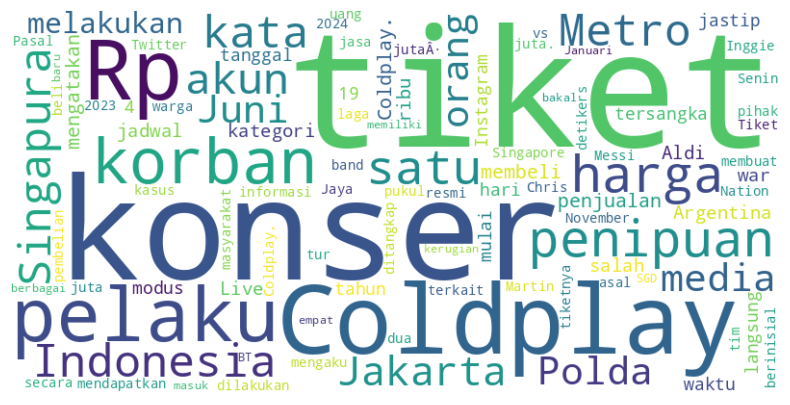

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua konten menjadi satu teks panjang
all_content = ' '.join(data1['Content'])

# Menghitung frekuensi kemunculan setiap kata
word_frequencies = {}
for word in all_content.split():
  if word not in word_frequencies:
    word_frequencies[word] = 1
  else:
    word_frequencies[word] += 1

# Mengurutkan kata-kata berdasarkan frekuensinya
sorted_words = sorted(word_frequencies.items(), key = lambda x: x[1], reverse = True)

# Memilih kata-kata dengan frekuensi tertinggi (misalnya, 100 kata teratas)
top_words = dict(sorted_words[:100])

# Membuat objek Word-Cloud
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate_from_frequencies(top_words)

# Menampilkan Word-Cloud
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**Histogram Jumlah Kata**

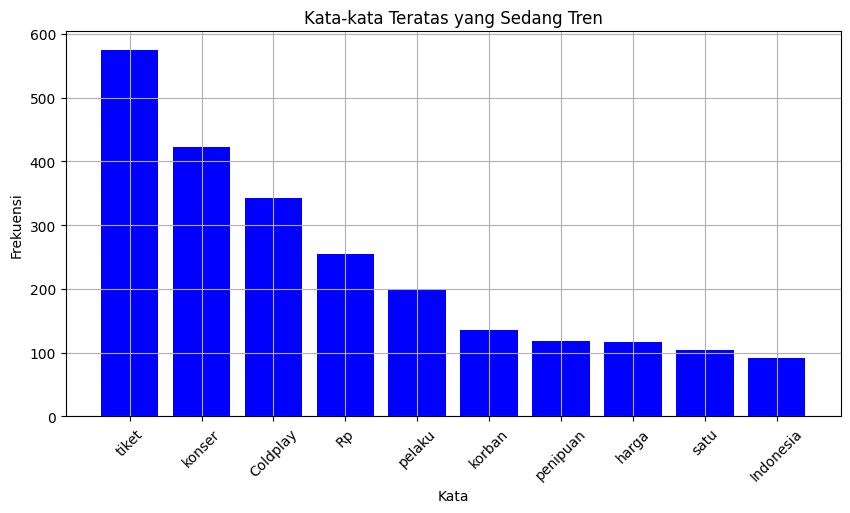

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Menggabungkan semua konten menjadi satu teks panjang
all_content = ' '.join(data1['Content'])

# Menghitung frekuensi kemunculan setiap kata
word_frequencies = {}
for word in all_content.split():
  if word not in word_frequencies:
    word_frequencies[word] = 1
  else:
    word_frequencies[word] += 1

# Mengurutkan kata-kata berdasarkan frekuensinya
sorted_words = sorted(word_frequencies.items(), key = lambda x: x[1], reverse = True)

# Memilih kata-kata dengan frekuensi tertinggi (misalnya, 10 kata teratas)
top_words = dict(sorted_words[:10])

# Membuat DataFrame dari kata-kata dan frekuensinya
df = pd.DataFrame(list(top_words.items()), columns = ['Kata', 'Frekuensi'])

# Mengurutkan DataFrame berdasarkan frekuensi secara menurun
df = df.sort_values('Frekuensi', ascending = False)

# Membuat plot diagram histogram
plt.figure(figsize=(10, 5))
plt.bar(df['Kata'], df['Frekuensi'], color='blue')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Kata-kata Teratas yang Sedang Tren')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Word-Tree**

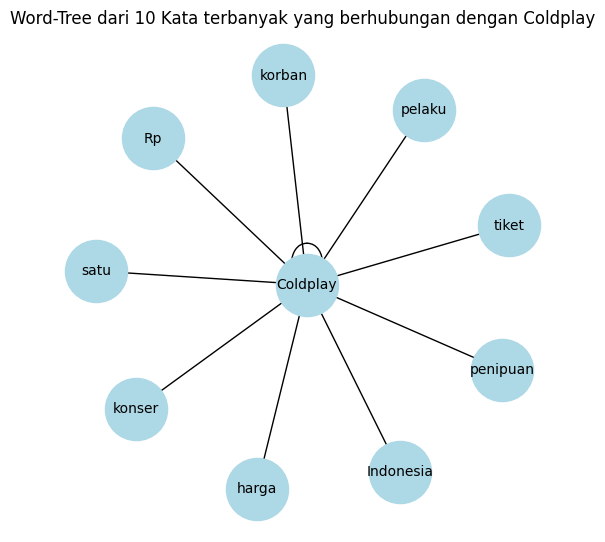

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import networkx as nx

# Menggabungkan semua teks dari kolom 'Content' dalam DataFrame data1
text_data = ' '.join(data1['Content'].values)

# Memilih 10 kata dengan frekuensi tertinggi
sorted_words = sorted(word_frequencies.items(), key = lambda x: x[1], reverse = True)
top_words = [word for word, count in sorted_words[:10]]

# Membuat daftar kata yang berhubungan
related_words = top_words

# Membuat objek Graph
G = nx.Graph()

for word in related_words:
  G.add_edge('Coldplay', word)  # Menambahkan sambungan antara 'LinkTree' dan kata

# Mengatur tata letak Graph
pos = nx.spring_layout(G, seed = 42)

# Menampilkan Graph
plt.figure(figsize = (5, 5))
nx.draw(G, pos, with_labels = True, node_color = 'lightblue', node_size = 2000, font_size = 10, font_color = 'black')
plt.title('Word-Tree dari 10 Kata terbanyak yang berhubungan dengan Coldplay')
plt.axis('off')
plt.show()

**Word-Link**

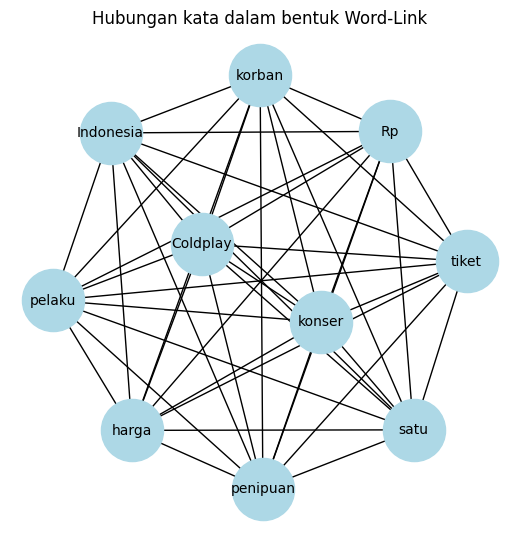

In [14]:
from collections import Counter
from itertools import combinations

# Mengumpulkan kata-kata unik dari kolom "Content"
all_words = ' '.join(data1['Content']).split()
word_counts = Counter(all_words)

# Memilih 10 kata dengan frekuensi tertinggi
top_words = [word for word, count in word_counts.most_common(10)]

# Membuat objek Graph
G = nx.Graph()

# Menambahkan edge ke dalam jaringan
for text in data1['Content']:
    words = set(text.split())
    intersect = words.intersection(top_words)
    edges = combinations(intersect, 2)
    G.add_edges_from(edges)

# Menambahkan node ke dalam jaringan
G.add_nodes_from(top_words)

# Menentukan posisi node
pos = nx.spring_layout(G)

# Menampilkan jaringan
plt.figure(figsize = (5,5))
nx.draw(G, pos, with_labels = True, node_color = 'lightblue', node_size = 2000, font_size = 10, font_color = 'black')
plt.title('Hubungan kata dalam bentuk Word-Link')
plt.show()

**Sentimen Publik**

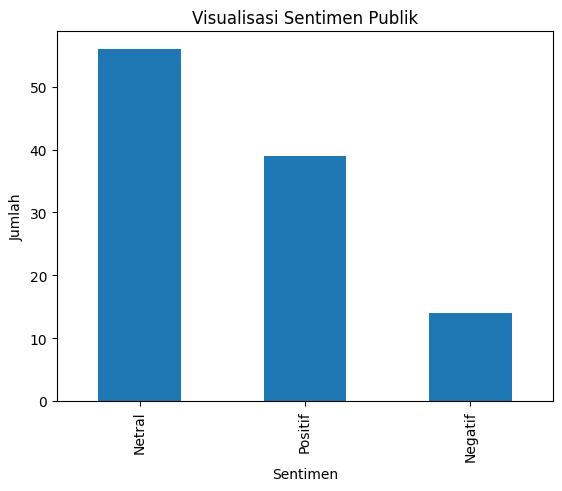

In [15]:
from textblob import TextBlob

# Mendapatkan sentimen teks
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment = blob.sentiment.polarity
  if sentiment > 0:
    return 'Positif'
  elif sentiment < 0:
    return 'Negatif'
  else:
    return 'Netral'

# Menerapkan analisis sentimen pada kolom 'Content'
data1['Sentiment'] = data1['Content'].apply(get_sentiment)

# Menampilkan visualisasi sentimen publik
sentiment_counts = data1['Sentiment'].value_counts()
sentiment_counts.plot(kind = 'bar', xlabel = 'Sentimen', ylabel = 'Jumlah', title = 'Visualisasi Sentimen Publik')
plt.show()